# Regresión Linear

In [10]:
# Importamos las librerías
import pandas as pd
import os

# URL del dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Ajustamos la ruta local a un directorio más accesible
ruta_local = "/workspace/regresion-linear/data/raw/df_rd.csv"

# Crear directorios
os.makedirs(os.path.dirname(ruta_local), exist_ok=True)

# Cargar el conjunto de datos
df_rd = pd.read_csv(url)
print("Datos cargados desde la URL con éxito.")

# Guardar una copia
try:
    df_rd.to_csv(ruta_local, index=False)
    print(f"Datos guardados localmente en: {ruta_local}")
except PermissionError:
    print("No se pudo guardar el archivo en la ruta especificada. Revisa los permisos o usa otro directorio.")

# Inspección inicial
print("\nCaracterísticas iniciales del DataFrame:")
print(df_rd.info())

# Preprocesamiento: eliminar duplicados y llenar valores nulos con 0
df_rd = df_rd.drop_duplicates().reset_index(drop=True)
df_rd = df_rd.fillna(0)

# Verificar si se eliminaron duplicados y nulos
print(f"\nFilas después de eliminar duplicados: {len(df_rd)}")
print(f"Valores nulos en el DataFrame:\n{df_rd.isnull().sum()}")

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras 7 filas del DataFrame procesado:")
print(df_rd.head(7))



Datos cargados desde la URL con éxito.
Datos guardados localmente en: /workspace/regresion-linear/data/raw/df_rd.csv

Características iniciales del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Filas después de eliminar duplicados: 1337
Valores nulos en el DataFrame:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Primeras 7 filas del DataFrame procesado:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900 

# Análisis Exploratorio de Datos

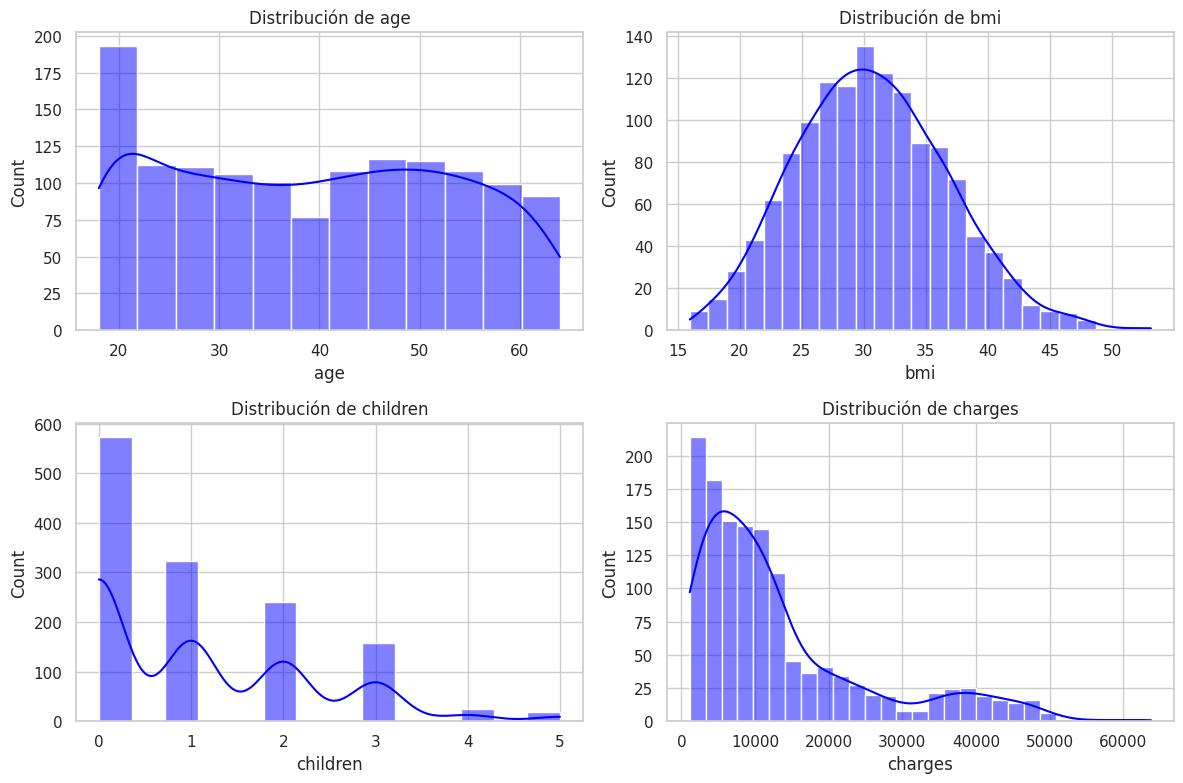

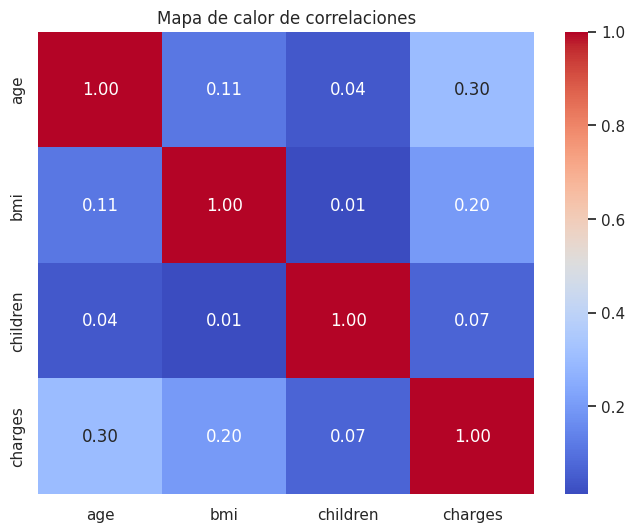

/tmp/ipykernel_1336/438449921.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rd, x=cat, palette="viridis")


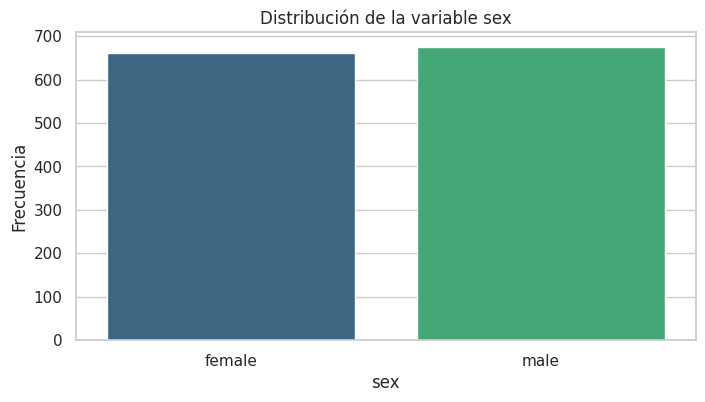

/tmp/ipykernel_1336/438449921.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rd, x=cat, palette="viridis")


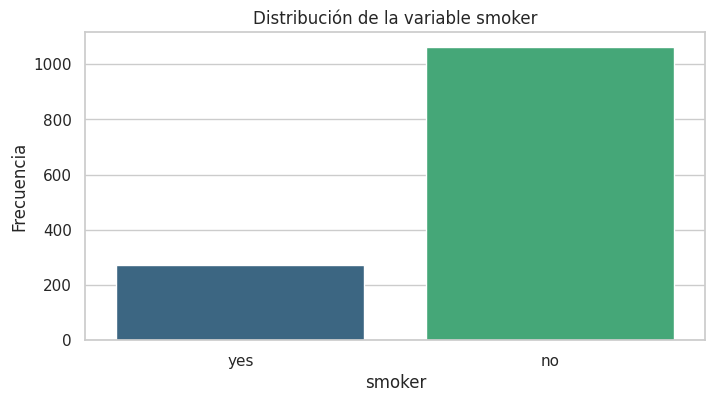

/tmp/ipykernel_1336/438449921.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rd, x=cat, palette="viridis")


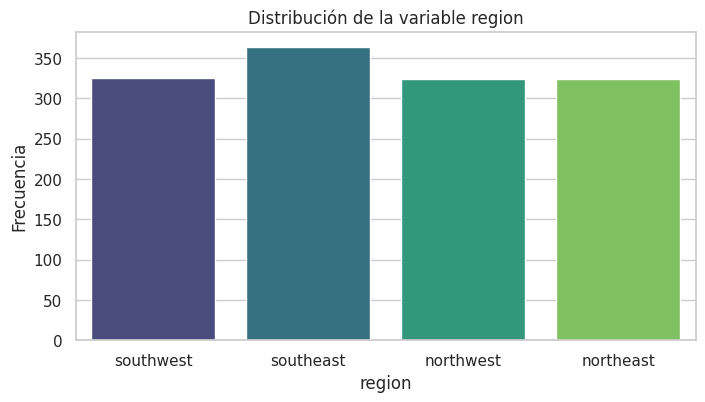

/tmp/ipykernel_1336/438449921.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rd, x='smoker', y='charges', palette="Set2")


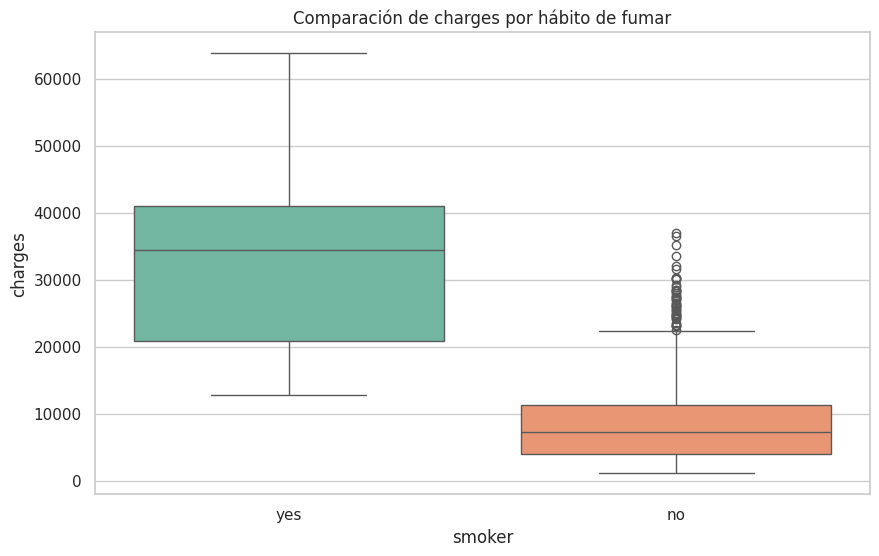

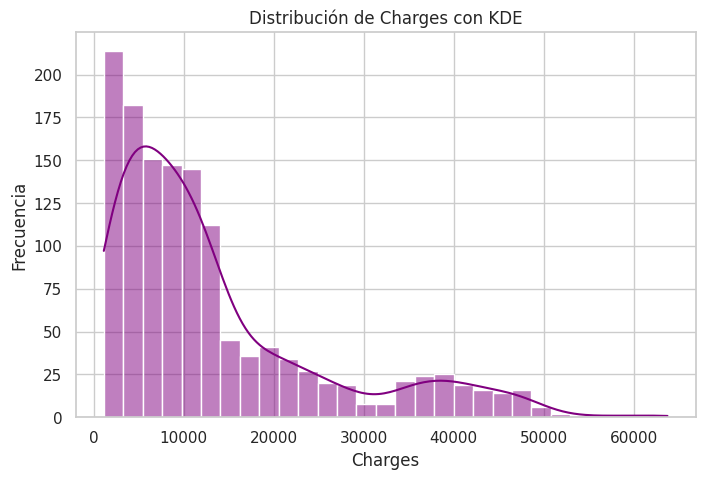

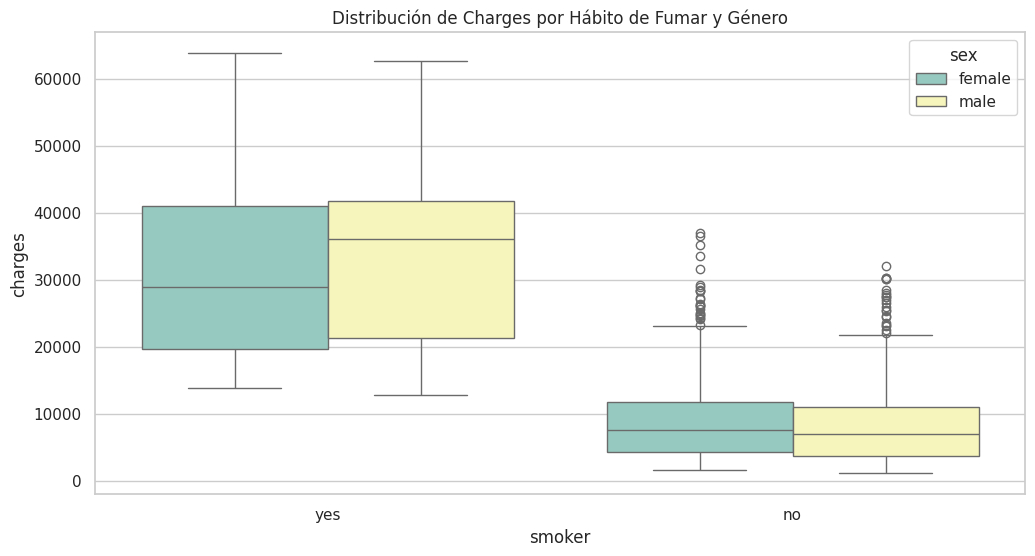

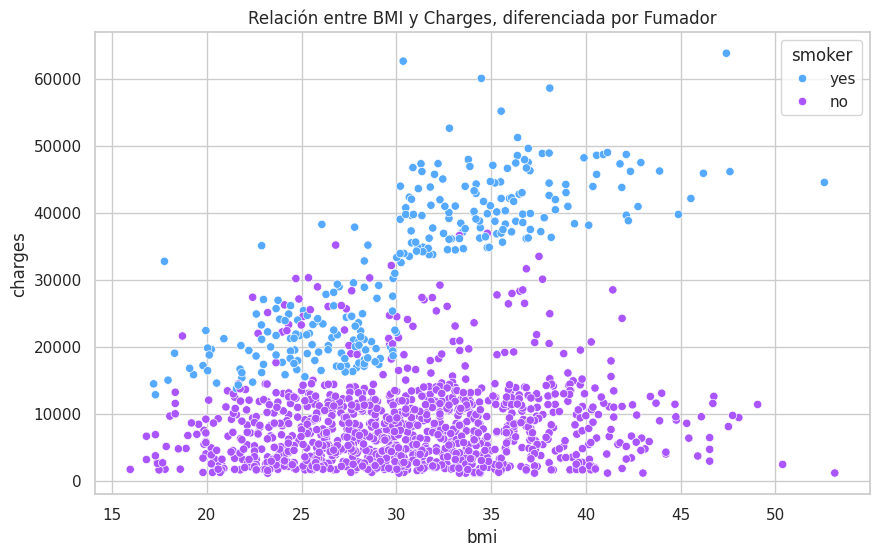

/tmp/ipykernel_1336/438449921.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rd, y=var, ax=axes[i], palette="pastel")
/tmp/ipykernel_1336/438449921.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rd, y=var, ax=axes[i], palette="pastel")
/tmp/ipykernel_1336/438449921.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rd, y=var, ax=axes[i], palette="pastel")
/tmp/ipykernel_1336/438449921.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

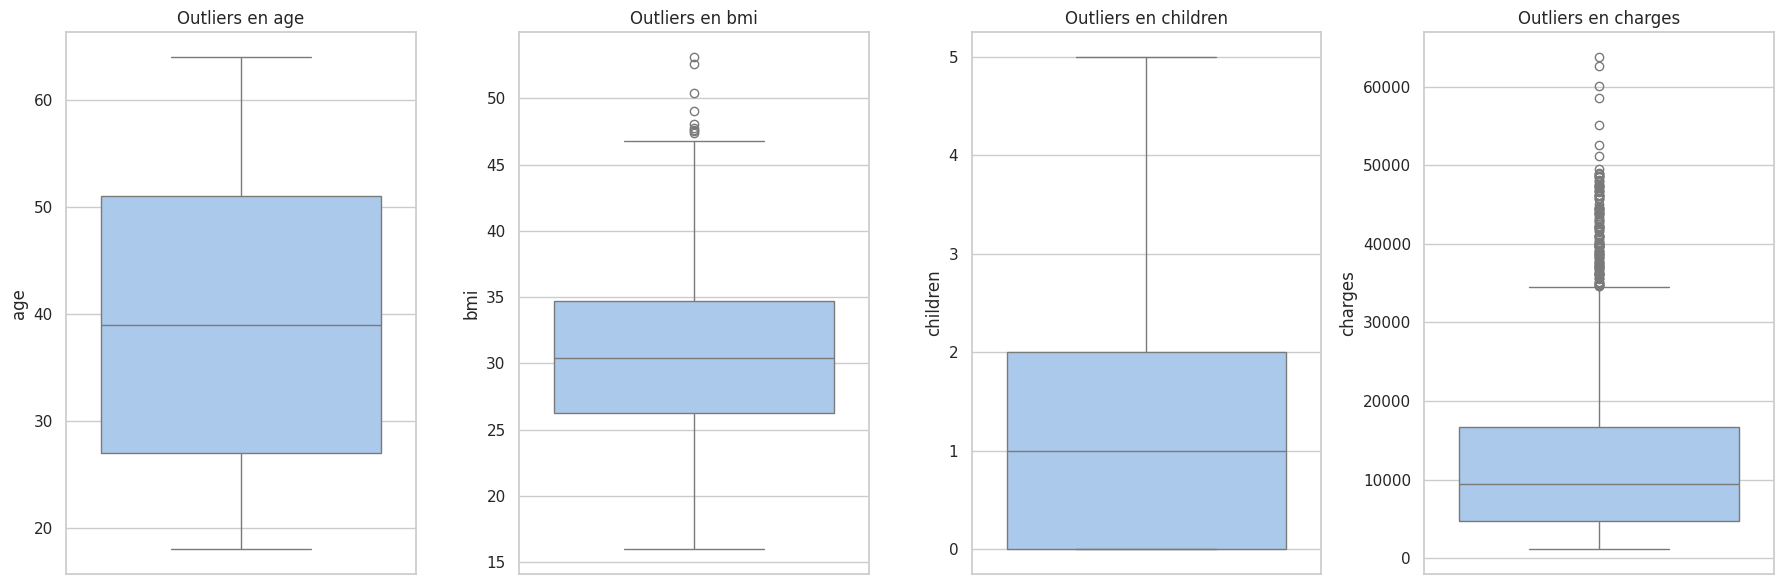

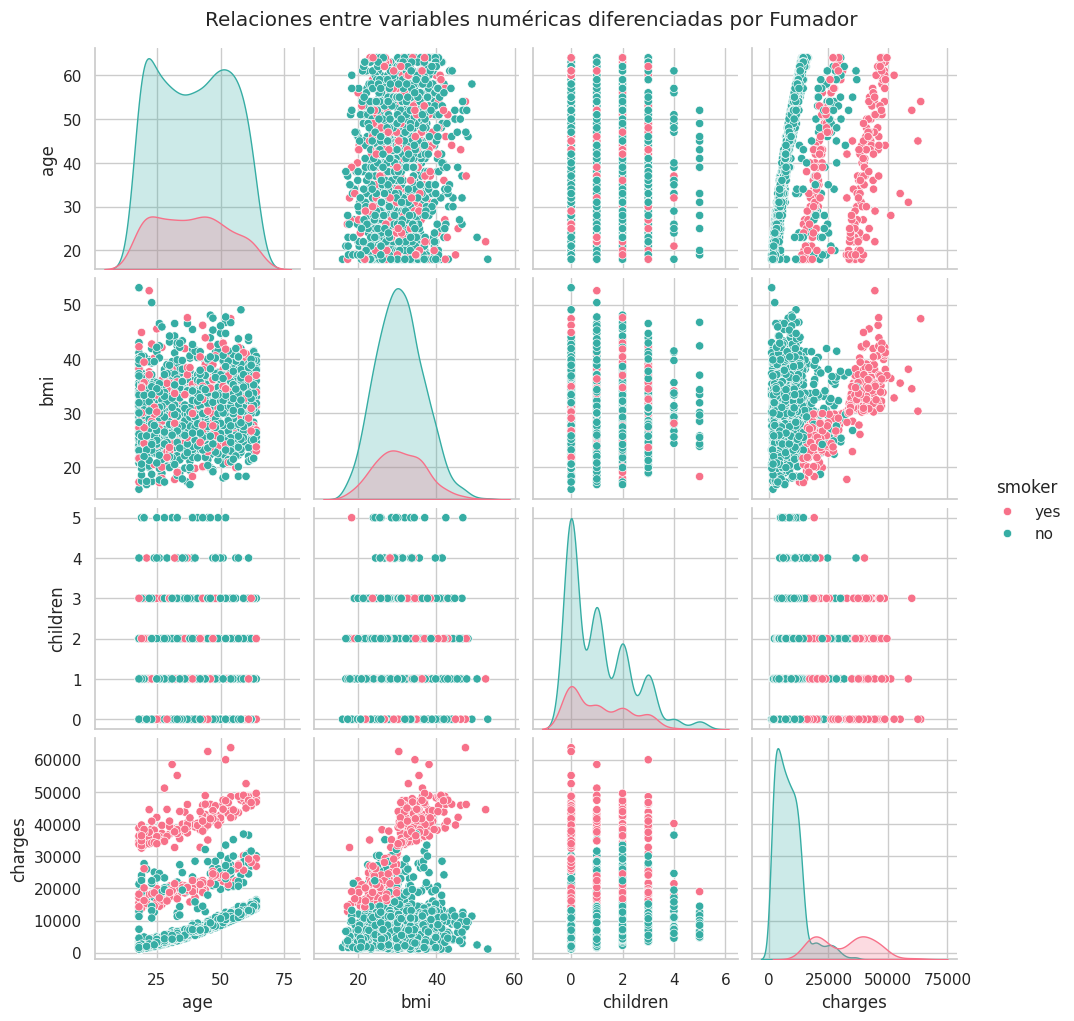


Estadísticas descriptivas avanzadas:
           count          mean           std        min       25%        50%  \
age       1337.0     39.222139     14.044333    18.0000    27.000    39.0000   
bmi       1337.0     30.663452      6.100468    15.9600    26.290    30.4000   
children  1337.0      1.095737      1.205571     0.0000     0.000     1.0000   
charges   1337.0  13279.121487  12110.359656  1121.8739  4746.344  9386.1613   

                  75%          max  
age          51.00000     64.00000  
bmi          34.70000     53.13000  
children      2.00000      5.00000  
charges   16657.71745  63770.42801  


<Figure size 1400x600 with 0 Axes>

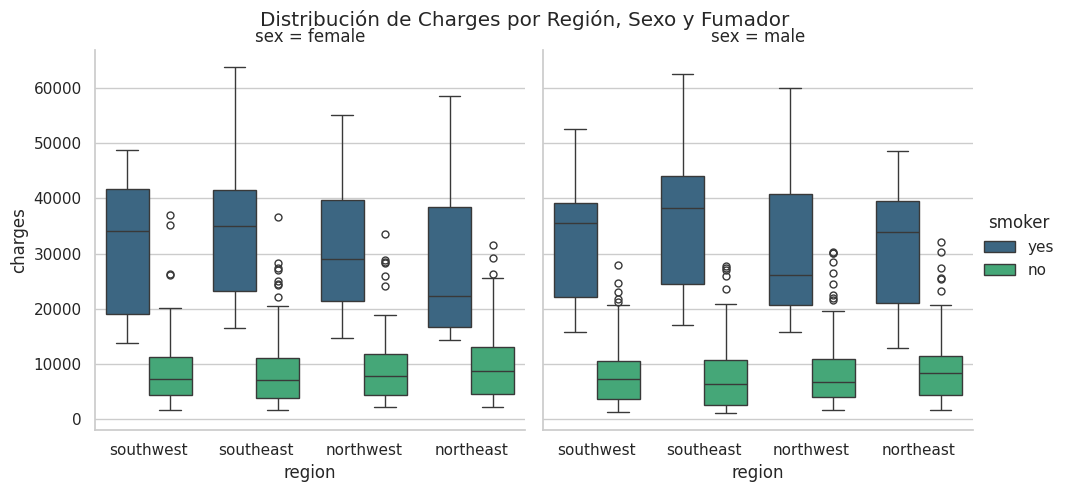

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Distribución de las variables
variables_numericas = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, var in enumerate(variables_numericas):
    sns.histplot(df_rd[var], kde=True, ax=axes[i // 2, i % 2], color="blue")
    axes[i // 2, i % 2].set_title(f"Distribución de {var}")
plt.tight_layout()
plt.show()

# Correlación entre las variables
correlaciones = df_rd[variables_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Mapa de calor de correlaciones")
plt.show()

# Análisis de variables
categoricas = ['sex', 'smoker', 'region']
for cat in categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_rd, x=cat, palette="viridis")
    plt.title(f"Distribución de la variable {cat}")
    plt.xlabel(cat)
    plt.ylabel("Frecuencia")
    plt.show()

# Boxplots para analizar outliers en la variable objetivo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rd, x='smoker', y='charges', palette="Set2")
plt.title("Comparación de charges por hábito de fumar")
plt.show()

# Histograma con distribución KDE para `charges`
plt.figure(figsize=(8, 5))
sns.histplot(df_rd['charges'], kde=True, color="purple")
plt.title("Distribución de Charges con KDE")
plt.xlabel("Charges")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de `charges` por categoría (fumador y género)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rd, x='smoker', y='charges', hue='sex', palette="Set3")
plt.title("Distribución de Charges por Hábito de Fumar y Género")
plt.show()

# Scatter plot para analizar `bmi` vs `charges` (coloreado por fumador)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rd, x='bmi', y='charges', hue='smoker', palette="cool")
plt.title("Relación entre BMI y Charges, diferenciada por Fumador")
plt.show()

# Análisis de outliers para todas las variables numéricas
num_vars = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(1, len(num_vars), figsize=(18, 6))
for i, var in enumerate(num_vars):
    sns.boxplot(data=df_rd, y=var, ax=axes[i], palette="pastel")
    axes[i].set_title(f"Outliers en {var}")
plt.tight_layout()
plt.show()

# Pairplot para relaciones cruzadas
sns.pairplot(df_rd, hue='smoker', palette='husl', diag_kind='kde')
plt.suptitle("Relaciones entre variables numéricas diferenciadas por Fumador", y=1.02)
plt.show()

# Métricas estadísticas adicionales
print("\nEstadísticas descriptivas avanzadas:")
print(df_rd.describe(percentiles=[0.25, 0.5, 0.75]).T)

# Relación cruzada entre fumador, género y región en relación con charges
plt.figure(figsize=(14, 6))
sns.catplot(data=df_rd, x='region', y='charges', hue='smoker', col='sex', kind='box', palette="viridis", height=5)
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribución de Charges por Región, Sexo y Fumador")
plt.show()



# Preparación de los datos

Datos normalizados guardados en el directorio indicado.
Ruta: /workspace/regresion-linear/data/processed
Evaluación del Modelo Mejorado:
MSE: 35478020.6752
R²: 0.8069


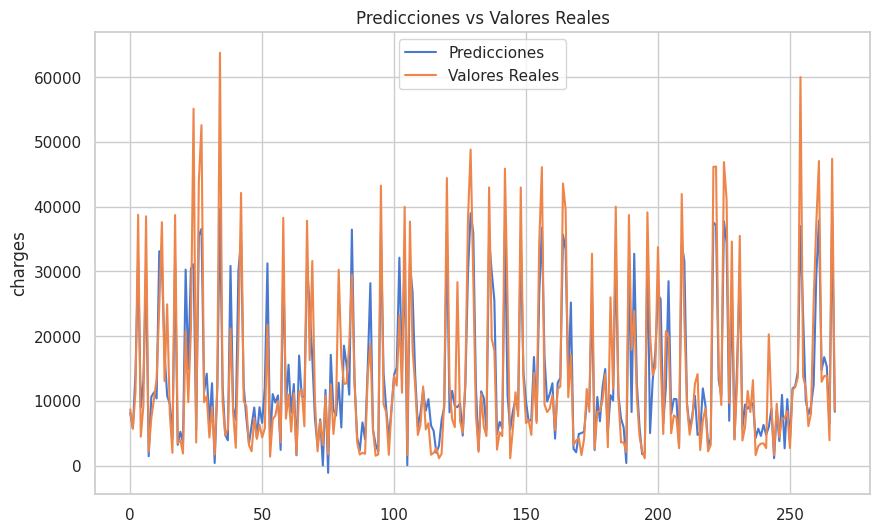

In [12]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Separar las características (X) y la variable objetivo (y)
X = df_rd.drop(columns=['charges'])
y = df_rd['charges']

# Identificar variables categóricas y numéricas
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Crear transformadores para cada tipo de variable
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
numerical_transformer = StandardScaler()

# Crear un preprocesador para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Dividir el conjunto de datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar las transformaciones en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_normalized = pipeline.fit_transform(X_train)
X_test_normalized = pipeline.transform(X_test)

# Guardar los datos en el path indicado
processed_path = "/workspace/regresion-linear/data/processed"
os.makedirs(processed_path, exist_ok=True)

# Convertir datos normalizados a DataFrames para guardarlos
X_train_df = pd.DataFrame(X_train_normalized, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_normalized, columns=preprocessor.get_feature_names_out())
y_train_df = pd.DataFrame(y_train.reset_index(drop=True), columns=["charges"])
y_test_df = pd.DataFrame(y_test.reset_index(drop=True), columns=["charges"])

# Guardar los conjuntos normalizados en archivos CSV
X_train_df.to_csv(f"{processed_path}/X_train.csv", index=False)
X_test_df.to_csv(f"{processed_path}/X_test.csv", index=False)
y_train_df.to_csv(f"{processed_path}/y_train.csv", index=False)
y_test_df.to_csv(f"{processed_path}/y_test.csv", index=False)

print("Datos normalizados guardados en el directorio indicado.")
print(f"Ruta: {processed_path}")

# Manejo de Outliers 

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos procesados
processed_path = "/workspace/regresion-linear/data/processed"
X_train = pd.read_csv(f"{processed_path}/X_train.csv")
X_test = pd.read_csv(f"{processed_path}/X_test.csv")
y_train = pd.read_csv(f"{processed_path}/y_train.csv")["charges"]
y_test = pd.read_csv(f"{processed_path}/y_test.csv")["charges"]

# Escalado robusto para manejar outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo Mejorado:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicciones")
sns.lineplot(x=range(len(y_test)), y=y_test, label="Valores Reales")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()



# Entrenamiento y evaluación del modelo

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Cargar los datos procesados
processed_path = "/workspace/regresion-linear/data/processed"
X_train = pd.read_csv(f"{processed_path}/X_train.csv")
X_test = pd.read_csv(f"{processed_path}/X_test.csv")
y_train = pd.read_csv(f"{processed_path}/y_train.csv")["charges"]
y_test = pd.read_csv(f"{processed_path}/y_test.csv")["charges"]

# Instanciar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Resultados
print("Evaluación del Modelo:")
print(f"R²: {r2:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")


Evaluación del Modelo:
R²: 0.81
MAE (Error Absoluto Medio): 4177.05
RMSE (Raíz del Error Cuadrático Medio): 5956.34


# Optimización del modelo

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# === Ridge Regression ===
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# Mejor modelo Ridge
ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluación Ridge
print("\n=== Ridge Regression ===")
print(f"Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"R² (Ridge): {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge):.4f}")

# === Lasso Regression ===
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.1, 0.5, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

# Mejor modelo Lasso
lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluación Lasso
print("\n=== Lasso Regression ===")
print(f"Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"R² (Lasso): {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MSE (Lasso): {mean_squared_error(y_test, y_pred_lasso):.4f}")



=== Ridge Regression ===
Best Alpha: 1
R² (Ridge): 0.8059
MSE (Ridge): 35672270.6178

=== Lasso Regression ===
Best Alpha: 10
R² (Lasso): 0.8060
MSE (Lasso): 35645084.0830


### Conclusiones sobre la optimización:
Ambos modelos alcanzaron un rendimiento similar al básico, lo que sugiere que las variables seleccionadas son relevantes y no se observaron signos claros de sobreajuste en el modelo inicial.